In [46]:
#importing all the packages required for the Assignment
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.metrics import confusion_matrix

In [2]:
#reading the data set
df = pd.read_csv("./train-io.txt", header=None, delimiter=' ')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.830433,1.494298,-2.141080,-2.155460,0.270127,-0.200620,0.093839,1.171075,1.403914,1.396813,-1.544217,1.676625,0
1,-1.408457,-2.556497,2.616034,3.000666,1.154949,0.288982,-0.404475,-3.067904,-0.783279,-0.588727,4.597042,-0.110411,1
2,1.760458,4.608794,-0.142573,1.472204,-3.849782,1.473854,-1.868692,-0.640403,0.538785,2.146118,3.052427,0.949428,1
3,-1.731262,0.231366,2.911554,0.163478,1.402251,-1.244460,0.827515,-2.875059,-0.323246,0.520745,-0.205174,-1.499808,1
4,1.333824,-1.561848,2.408792,0.433006,0.477863,-1.966526,1.684337,-1.867530,2.521149,-3.183390,5.744132,-1.597498,0


In [3]:
# rename all columns
df.columns = [f"x{i}" for i in range(1, 13)] + ['y']
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,1.830433,1.494298,-2.141080,-2.155460,0.270127,-0.200620,0.093839,1.171075,1.403914,1.396813,-1.544217,1.676625,0
1,-1.408457,-2.556497,2.616034,3.000666,1.154949,0.288982,-0.404475,-3.067904,-0.783279,-0.588727,4.597042,-0.110411,1
2,1.760458,4.608794,-0.142573,1.472204,-3.849782,1.473854,-1.868692,-0.640403,0.538785,2.146118,3.052427,0.949428,1
3,-1.731262,0.231366,2.911554,0.163478,1.402251,-1.244460,0.827515,-2.875059,-0.323246,0.520745,-0.205174,-1.499808,1
4,1.333824,-1.561848,2.408792,0.433006,0.477863,-1.966526,1.684337,-1.867530,2.521149,-3.183390,5.744132,-1.597498,0


In [4]:
# checking for null values
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
y      0
dtype: int64

In [5]:
#checking if the dataset is balanced or not
df.y.value_counts()

1    161077
0    138923
Name: y, dtype: int64

In [6]:
#finding the correlation of all the variables in the data-set
df.corr().style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
x1,1.000000,-0.128330,-0.343222,0.148338,-0.082265,-0.088297,-0.281078,0.233454,0.503309,-0.191495,0.378637,0.422265,0.000826
x2,-0.128330,1.000000,-0.167532,-0.127688,-0.511027,-0.017310,-0.061967,0.250484,-0.159071,0.489932,-0.397303,-0.290247,0.000459
x3,-0.343222,-0.167532,1.000000,-0.044367,-0.037546,-0.045081,0.192856,-0.533472,0.211517,-0.405843,0.251416,-0.376414,0.000362
x4,0.148338,-0.127688,-0.044367,1.000000,-0.058117,0.288235,-0.219120,-0.333291,-0.104060,-0.007152,0.568115,-0.163343,0.001955
x5,-0.082265,-0.511027,-0.037546,-0.058117,1.000000,-0.476623,0.228541,-0.084957,0.284904,-0.327000,-0.058278,0.329247,0.001165
x6,-0.088297,-0.017310,-0.045081,0.288235,-0.476623,1.000000,0.000063,0.058134,-0.188257,0.094271,0.038777,-0.084539,-0.002027
x7,-0.281078,-0.061967,0.192856,-0.219120,0.228541,0.000063,1.000000,-0.059085,0.212198,-0.015100,-0.088188,-0.053454,-0.001032
x8,0.233454,0.250484,-0.533472,-0.333291,-0.084957,0.058134,-0.059085,1.000000,-0.100246,-0.014849,-0.575807,0.105183,0.000413
x9,0.503309,-0.159071,0.211517,-0.104060,0.284904,-0.188257,0.212198,-0.100246,1.000000,-0.417446,0.286377,0.384590,0.000892
x10,-0.191495,0.489932,-0.405843,-0.007152,-0.327000,0.094271,-0.015100,-0.014849,-0.417446,1.000000,-0.318334,0.234481,-0.001401


In [7]:
y = df.pop('y')
X = df
display(df.head())
print(y[:10])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,1.830433,1.494298,-2.141080,-2.155460,0.270127,-0.200620,0.093839,1.171075,1.403914,1.396813,-1.544217,1.676625
1,-1.408457,-2.556497,2.616034,3.000666,1.154949,0.288982,-0.404475,-3.067904,-0.783279,-0.588727,4.597042,-0.110411
2,1.760458,4.608794,-0.142573,1.472204,-3.849782,1.473854,-1.868692,-0.640403,0.538785,2.146118,3.052427,0.949428
3,-1.731262,0.231366,2.911554,0.163478,1.402251,-1.244460,0.827515,-2.875059,-0.323246,0.520745,-0.205174,-1.499808
4,1.333824,-1.561848,2.408792,0.433006,0.477863,-1.966526,1.684337,-1.867530,2.521149,-3.183390,5.744132,-1.597498


0    0
1    1
2    1
3    1
4    0
5    1
6    0
7    0
8    1
9    1
Name: y, dtype: int64


In [8]:
#checking the range of each continuous variable
df.agg([min, max])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
min,-5.002253,-9.426396,-6.889677,-6.727678,-6.814575,-5.760816,-5.872210,-6.586501,-7.682507,-5.916694,-9.062599,-7.906362
max,4.684574,8.898895,7.453131,6.715654,6.548304,5.574340,6.122361,6.354650,7.507812,6.293319,8.771217,7.918844


In [9]:
X.corr().style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
x1,1.000000,-0.128330,-0.343222,0.148338,-0.082265,-0.088297,-0.281078,0.233454,0.503309,-0.191495,0.378637,0.422265
x2,-0.128330,1.000000,-0.167532,-0.127688,-0.511027,-0.017310,-0.061967,0.250484,-0.159071,0.489932,-0.397303,-0.290247
x3,-0.343222,-0.167532,1.000000,-0.044367,-0.037546,-0.045081,0.192856,-0.533472,0.211517,-0.405843,0.251416,-0.376414
x4,0.148338,-0.127688,-0.044367,1.000000,-0.058117,0.288235,-0.219120,-0.333291,-0.104060,-0.007152,0.568115,-0.163343
x5,-0.082265,-0.511027,-0.037546,-0.058117,1.000000,-0.476623,0.228541,-0.084957,0.284904,-0.327000,-0.058278,0.329247
x6,-0.088297,-0.017310,-0.045081,0.288235,-0.476623,1.000000,0.000063,0.058134,-0.188257,0.094271,0.038777,-0.084539
x7,-0.281078,-0.061967,0.192856,-0.219120,0.228541,0.000063,1.000000,-0.059085,0.212198,-0.015100,-0.088188,-0.053454
x8,0.233454,0.250484,-0.533472,-0.333291,-0.084957,0.058134,-0.059085,1.000000,-0.100246,-0.014849,-0.575807,0.105183
x9,0.503309,-0.159071,0.211517,-0.104060,0.284904,-0.188257,0.212198,-0.100246,1.000000,-0.417446,0.286377,0.384590
x10,-0.191495,0.489932,-0.405843,-0.007152,-0.327000,0.094271,-0.015100,-0.014849,-0.417446,1.000000,-0.318334,0.234481


## train test split 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
ele = [X_train, X_test, y_train, y_test]
for element in ele:
    print(element.shape)

(240000, 12)
(60000, 12)
(240000,)
(60000,)


In [12]:
print(y_train.value_counts())
print(y_test.value_counts())

1    128862
0    111138
Name: y, dtype: int64
1    32215
0    27785
Name: y, dtype: int64


 ## logistic Regression

In [13]:
lr = LogisticRegression(random_state=42, penalty='elasticnet', solver='saga', l1_ratio=0.7)
lr.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.7, penalty='elasticnet', random_state=42,
                   solver='saga')

In [14]:
# train/test acc
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [15]:
# train accuracy report
print(classification_report(y_train, y_pred_train))

c:\users\atikant negi\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    111138
           1       0.54      1.00      0.70    128862

    accuracy                           0.54    240000
   macro avg       0.27      0.50      0.35    240000
weighted avg       0.29      0.54      0.38    240000



In [16]:
# test accuracy report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27785
           1       0.54      1.00      0.70     32215

    accuracy                           0.54     60000
   macro avg       0.27      0.50      0.35     60000
weighted avg       0.29      0.54      0.38     60000



## Random Forest

In [17]:
clf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [18]:
# train/test acc
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [19]:
# train acc
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.66      0.08      0.14    111138
           1       0.55      0.97      0.70    128862

    accuracy                           0.55    240000
   macro avg       0.60      0.52      0.42    240000
weighted avg       0.60      0.55      0.44    240000

0.5539125


In [20]:
# test acc
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.07      0.13     27785
           1       0.55      0.96      0.70     32215

    accuracy                           0.55     60000
   macro avg       0.58      0.52      0.41     60000
weighted avg       0.58      0.55      0.43     60000



In [21]:
for x, imp in zip(X_train.columns, clf.feature_importances_):
    print(f"{x} = {imp}")

x1 = 0.0348893013003428
x2 = 0.05860473675949498
x3 = 0.06982262232574833
x4 = 0.0987615441653527
x5 = 0.03975724068695697
x6 = 0.132409769320012
x7 = 0.12781932730104714
x8 = 0.20001604590451097
x9 = 0.04009357474199099
x10 = 0.016513245714921573
x11 = 0.07154253535315297
x12 = 0.10977005642646881


In [22]:
clf2 = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)
clf2.fit(X_train[['x4', 'x6', 'x7', 'x8', 'x12']], y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [23]:
# train/test acc
y_pred_train = clf2.predict(X_train[['x4', 'x6', 'x7', 'x8', 'x12']])
y_pred_test = clf2.predict(X_test[['x4', 'x6', 'x7', 'x8', 'x12']])

In [24]:
# train acc
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.61      0.11      0.18    111138
           1       0.55      0.94      0.69    128862

    accuracy                           0.55    240000
   macro avg       0.58      0.52      0.44    240000
weighted avg       0.58      0.55      0.46    240000

0.554125


In [25]:
# test acc
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.10      0.17     27785
           1       0.55      0.94      0.69     32215

    accuracy                           0.55     60000
   macro avg       0.56      0.52      0.43     60000
weighted avg       0.56      0.55      0.45     60000



## PCA to reduce dim

In [26]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

In [27]:
X_pca

array([[-5.3067794 ,  3.34325827, -0.72224371],
       [ 2.54264083, -0.87475818, -0.60193364],
       [-0.73364431, -6.73507385, -1.81190553],
       ...,
       [-1.84017796,  2.93674212, -0.8320109 ],
       [ 4.45848088,  3.36770618, -1.29242289],
       [ 0.54041186, -1.0105803 , -3.90166722]])

In [28]:
clf2.fit(X_pca, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [29]:
# train/test acc
y_pred_train = clf2.predict(X_pca)
y_pred_test = clf2.predict(pca.transform(X_test))

In [30]:
# train acc
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.59      0.07      0.12    111138
           1       0.54      0.96      0.69    128862

    accuracy                           0.55    240000
   macro avg       0.57      0.51      0.41    240000
weighted avg       0.57      0.55      0.43    240000

0.54675


## SVC

In [31]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [32]:
# train/test acc
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [33]:
# train acc
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50    111138
           1       0.61      0.80      0.69    128862

    accuracy                           0.62    240000
   macro avg       0.63      0.61      0.60    240000
weighted avg       0.62      0.62      0.60    240000

0.6202666666666666


In [34]:
# test acc
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.39      0.48     27785
           1       0.60      0.79      0.68     32215

    accuracy                           0.60     60000
   macro avg       0.61      0.59      0.58     60000
weighted avg       0.61      0.60      0.59     60000



# Artificial n n (basic)

In [35]:
# reading the data-set
df = pd.read_csv("./train-io.txt", header=None, delimiter=' ')
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.830433,1.494298,-2.141080,-2.155460,0.270127,-0.200620,0.093839,1.171075,1.403914,1.396813,-1.544217,1.676625,0
1,-1.408457,-2.556497,2.616034,3.000666,1.154949,0.288982,-0.404475,-3.067904,-0.783279,-0.588727,4.597042,-0.110411,1
2,1.760458,4.608794,-0.142573,1.472204,-3.849782,1.473854,-1.868692,-0.640403,0.538785,2.146118,3.052427,0.949428,1
3,-1.731262,0.231366,2.911554,0.163478,1.402251,-1.244460,0.827515,-2.875059,-0.323246,0.520745,-0.205174,-1.499808,1
4,1.333824,-1.561848,2.408792,0.433006,0.477863,-1.966526,1.684337,-1.867530,2.521149,-3.183390,5.744132,-1.597498,0


In [36]:
#seperating x's and y
y=df.pop(12)
x=df

In [37]:
#scaling the x's
X_scale = min_max_scaler.fit_transform(x)
X_scale

array([[0.70535851, 0.59593562, 0.33107866, ..., 0.59897614, 0.42158007,
        0.60555211],
       [0.37099828, 0.3748862 , 0.66275107, ..., 0.43636045, 0.76594043,
        0.49262869],
       [0.69813475, 0.76589182, 0.47041725, ..., 0.66034427, 0.67932883,
        0.55960027],
       ...,
       [0.54358163, 0.49743256, 0.60796987, ..., 0.29775459, 0.38746393,
        0.37635518],
       [0.2012793 , 0.49334068, 0.86535766, ..., 0.40980429, 0.5767754 ,
        0.44924715],
       [0.6179959 , 0.54900572, 0.48263379, ..., 0.56797084, 0.50144701,
        0.56984997]])

In [38]:
#spliting the dataset in train and validation
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [39]:
#creating layers and setting the activation function
model = Sequential([
    Dense(60, activation='relu', input_shape=( 12 ,)),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
#compiler settings for the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
# callback to stop epoch in case of high loss 
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
hist = model.fit(X_train, y_train,
          batch_size=20, epochs=50, validation_split=0.2,callbacks=[es])

Epoch 1/50
9600/9600 [==============================] - 11s 1ms/step - loss: 0.6904 - accuracy: 0.5346 - val_loss: 0.6864 - val_accuracy: 0.5508
Epoch 2/50
9600/9600 [==============================] - 9s 946us/step - loss: 0.6860 - accuracy: 0.5504 - val_loss: 0.6898 - val_accuracy: 0.5461
Epoch 3/50
9600/9600 [==============================] - 9s 937us/step - loss: 0.6835 - accuracy: 0.5590 - val_loss: 0.6820 - val_accuracy: 0.5627
Epoch 4/50
9600/9600 [==============================] - 9s 941us/step - loss: 0.6817 - accuracy: 0.5633 - val_loss: 0.6813 - val_accuracy: 0.5670
Epoch 5/50
9600/9600 [==============================] - 9s 906us/step - loss: 0.6798 - accuracy: 0.5680 - val_loss: 0.6807 - val_accuracy: 0.5671
Epoch 6/50
9600/9600 [==============================] - 8s 809us/step - loss: 0.6785 - accuracy: 0.5713 - val_loss: 0.6782 - val_accuracy: 0.5745
Epoch 7/50
9600/9600 [==============================] - 8s 804us/step - loss: 0.6774 - accuracy: 0.5743 - val_loss: 0.6781 - 

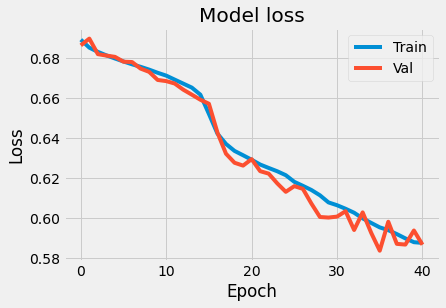

In [42]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

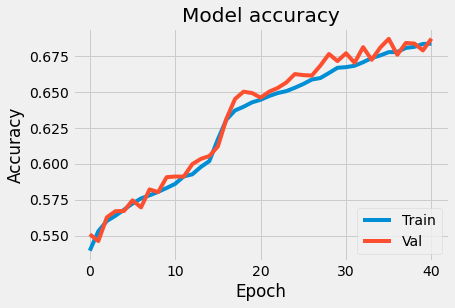

In [43]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [44]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 

In [47]:
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

           0       0.69      0.58      0.63    111184
           1       0.68      0.78      0.73    128816

    accuracy                           0.69    240000
   macro avg       0.69      0.68      0.68    240000
weighted avg       0.69      0.69      0.68    240000

Confusion Matrix: 
 [[ 64935  46249]
 [ 28642 100174]]

Accuracy:  0.6879541666666666



In [48]:
pred = model.predict(X_test)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

              precision    recall  f1-score   support

           0       0.69      0.58      0.63     27739
           1       0.68      0.78      0.73     32261

    accuracy                           0.69     60000
   macro avg       0.69      0.68      0.68     60000
weighted avg       0.69      0.69      0.68     60000

Confusion Matrix: 
 [[16029 11710]
 [ 7157 25104]]

Accuracy:  0.68555



In [49]:
model.evaluate(X_test, y_test)[1]

1875/1875 [==============================] - 2s 783us/step - loss: 0.5860 - accuracy: 0.6855


0.6855499744415283

# Artificial neural network [different layers 64,32,16 ,1]

In [50]:
df = pd.read_csv("./train-io.txt", header=None, delimiter=' ')

In [51]:
y=df.pop(12)
x=df

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 4)

In [53]:
model = Sequential([
    Dense(64, activation='relu', input_shape=( 12 ,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
hist = model.fit(X_train, y_train,
          batch_size=20, epochs=50, validation_split=0.2,callbacks=[es])

Epoch 1/50
9600/9600 [==============================] - 9s 869us/step - loss: 0.6879 - accuracy: 0.5453 - val_loss: 0.6717 - val_accuracy: 0.5833
Epoch 2/50
9600/9600 [==============================] - 8s 852us/step - loss: 0.6679 - accuracy: 0.5921 - val_loss: 0.6520 - val_accuracy: 0.6169
Epoch 3/50
9600/9600 [==============================] - 8s 856us/step - loss: 0.6272 - accuracy: 0.6469 - val_loss: 0.5989 - val_accuracy: 0.6740
Epoch 4/50
9600/9600 [==============================] - 9s 909us/step - loss: 0.5901 - accuracy: 0.6794 - val_loss: 0.5837 - val_accuracy: 0.6853
Epoch 5/50
9600/9600 [==============================] - 8s 847us/step - loss: 0.5768 - accuracy: 0.6895 - val_loss: 0.5686 - val_accuracy: 0.6939
Epoch 6/50
9600/9600 [==============================] - 8s 854us/step - loss: 0.5667 - accuracy: 0.6980 - val_loss: 0.5660 - val_accuracy: 0.7001
Epoch 7/50
9600/9600 [==============================] - 8s 823us/step - loss: 0.5572 - accuracy: 0.7060 - val_loss: 0.5489 -

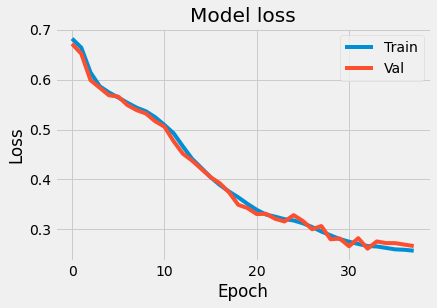

In [56]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

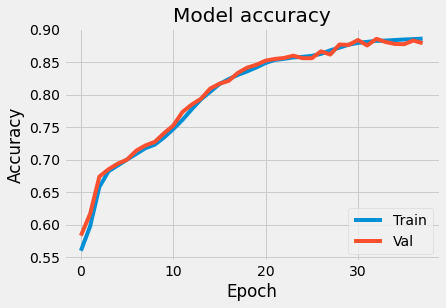

In [57]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [58]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [59]:
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

           0       0.86      0.89      0.87    111184
           1       0.90      0.87      0.89    128816

    accuracy                           0.88    240000
   macro avg       0.88      0.88      0.88    240000
weighted avg       0.88      0.88      0.88    240000

Confusion Matrix: 
 [[ 99387  11797]
 [ 16627 112189]]

Accuracy:  0.8815666666666667



In [60]:
model.evaluate(X_test, y_test)[1]

1875/1875 [==============================] - 2s 758us/step - loss: 0.2628 - accuracy: 0.8797


0.8797000050544739

In [61]:
test_in = pd.read_csv("./test-in.txt", header=None, delimiter=' ')

In [62]:
#Make a prediction & print the actual values
prediction = model.predict(test_in)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)


[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

# Artificial neural network 7 layers nodes[64,32,16,8,4,2,1]

In [63]:
df = pd.read_csv("./train-io.txt", header=None, delimiter=' ')

In [64]:
y=df.pop(12)
x=df

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 4)

In [66]:
model = Sequential([
    Dense(64, activation='relu', input_shape=( 12 ,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [67]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
hist = model.fit(X_train, y_train,
          batch_size=50, epochs=50, validation_split=0.2,callbacks=[es])

Epoch 1/50
3840/3840 [==============================] - 4s 863us/step - loss: 0.6910 - accuracy: 0.5301 - val_loss: 0.6881 - val_accuracy: 0.5461
Epoch 2/50
3840/3840 [==============================] - 3s 863us/step - loss: 0.6878 - accuracy: 0.5469 - val_loss: 0.6852 - val_accuracy: 0.5553
Epoch 3/50
3840/3840 [==============================] - 3s 849us/step - loss: 0.6855 - accuracy: 0.5550 - val_loss: 0.6824 - val_accuracy: 0.5629
Epoch 4/50
3840/3840 [==============================] - 3s 836us/step - loss: 0.6823 - accuracy: 0.5621 - val_loss: 0.6798 - val_accuracy: 0.5700
Epoch 5/50
3840/3840 [==============================] - 3s 846us/step - loss: 0.6788 - accuracy: 0.5705 - val_loss: 0.6771 - val_accuracy: 0.5748
Epoch 6/50
3840/3840 [==============================] - 3s 817us/step - loss: 0.6757 - accuracy: 0.5773 - val_loss: 0.6754 - val_accuracy: 0.5754
Epoch 7/50
3840/3840 [==============================] - 3s 831us/step - loss: 0.6741 - accuracy: 0.5808 - val_loss: 0.6734 -

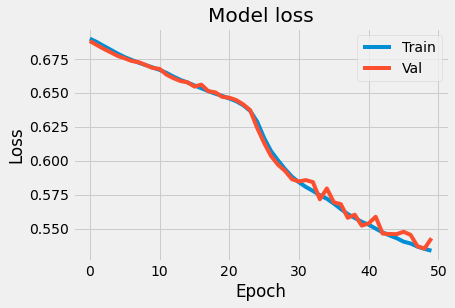

In [69]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

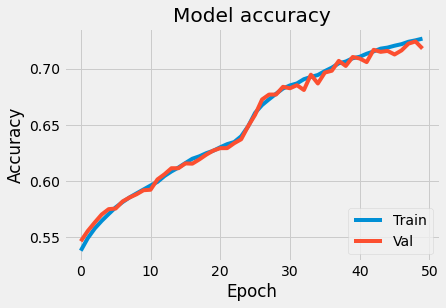

In [70]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [71]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 

In [72]:
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

           0       0.67      0.78      0.72    111184
           1       0.78      0.67      0.72    128816

    accuracy                           0.72    240000
   macro avg       0.73      0.73      0.72    240000
weighted avg       0.73      0.72      0.72    240000

Confusion Matrix: 
 [[86820 24364]
 [42310 86506]]

Accuracy:  0.7221916666666667



In [73]:
model.evaluate(X_test, y_test)[1]

1875/1875 [==============================] - 2s 812us/step - loss: 0.5397 - accuracy: 0.7194


0.7193666696548462

# Artificial nn with 4 layers with nodes[60,30,15,1]

In [93]:
df = pd.read_csv("./train-io.txt", header=None, delimiter=' ')

In [94]:
y=df.pop(12)
x=df

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 4)

In [96]:
ele = [X_train, X_test, y_train, y_test]
for element in ele:
    print(element.shape)

(240000, 12)
(60000, 12)
(240000,)
(60000,)


In [97]:
model = Sequential([
    Dense(60, activation='relu', input_dim=12 ),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [98]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [99]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
hist = model.fit(X_train, y_train,
          batch_size=20, epochs=50, validation_split=0.2,callbacks=[es])

Epoch 1/50
9600/9600 [==============================] - 9s 875us/step - loss: 0.6887 - accuracy: 0.5428 - val_loss: 0.6730 - val_accuracy: 0.5821
Epoch 2/50
9600/9600 [==============================] - 8s 851us/step - loss: 0.6694 - accuracy: 0.5895 - val_loss: 0.6585 - val_accuracy: 0.6089
Epoch 3/50
9600/9600 [==============================] - 8s 831us/step - loss: 0.6466 - accuracy: 0.6231 - val_loss: 0.6118 - val_accuracy: 0.6617
Epoch 4/50
9600/9600 [==============================] - 8s 858us/step - loss: 0.6048 - accuracy: 0.6690 - val_loss: 0.5991 - val_accuracy: 0.6754
Epoch 5/50
9600/9600 [==============================] - 8s 840us/step - loss: 0.5909 - accuracy: 0.6815 - val_loss: 0.5809 - val_accuracy: 0.6861
Epoch 6/50
9600/9600 [==============================] - 8s 861us/step - loss: 0.5713 - accuracy: 0.6981 - val_loss: 0.5566 - val_accuracy: 0.7085
Epoch 7/50
9600/9600 [==============================] - 8s 865us/step - loss: 0.5559 - accuracy: 0.7123 - val_loss: 0.5440 -

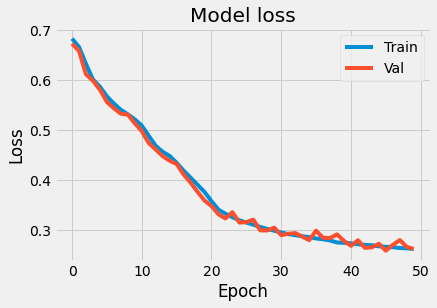

In [100]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

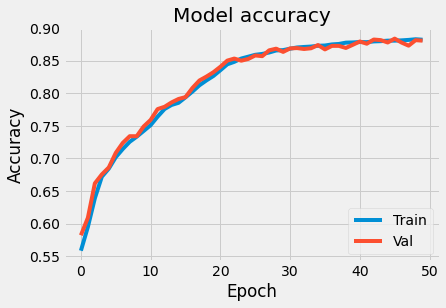

In [101]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [102]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [103]:
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

           0       0.89      0.86      0.87    111184
           1       0.88      0.91      0.89    128816

    accuracy                           0.88    240000
   macro avg       0.88      0.88      0.88    240000
weighted avg       0.88      0.88      0.88    240000

Confusion Matrix: 
 [[ 95173  16011]
 [ 11841 116975]]

Accuracy:  0.88395



In [104]:
model.evaluate(X_test, y_test)[1]

1875/1875 [==============================] - 2s 779us/step - loss: 0.2601 - accuracy: 0.8833


0.8832666873931885

In [105]:
#reading test file
test_in = pd.read_csv("./test-in.txt", header=None, delimiter=' ')
#Make a prediction & print the actual values
prediction_on_test = model.predict(test_in)
prediction_on_test  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction_on_test)

[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [106]:
pd.DataFrame(prediction_on_test).to_csv("test-out.txt", header=None, index=False)

AREA UNDER ROC:  0.88138200942154


<function matplotlib.pyplot.show(close=None, block=None)>

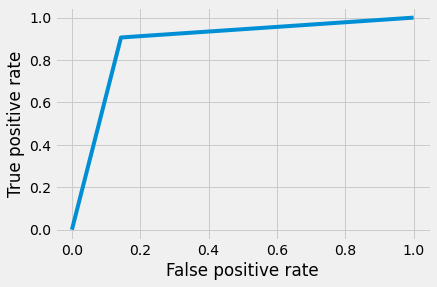

In [107]:
# ROC curve for the best model
from sklearn.metrics import roc_curve,roc_auc_score
#AUROC
ann_auc=roc_auc_score(y_test,prediction)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(y_test,prediction)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show